In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import os
from tqdm import tqdm

import missingno as msno

In [6]:
train_path = 'C:/Users/mhmdm/Desktop/veri analizi projesi/dataset/EEG-Alcohol/SMNI_CMI_TRAIN'  
test_path = 'C:/Users/mhmdm/Desktop/veri analizi projesi/dataset/EEG-Alcohol/SMNI_CMI_TEST'  

def load_data(data_directory):
    all_data = []
    files = [file for file in os.listdir(data_directory) if file.endswith('.csv')]
    for filename in tqdm(files, desc="Loading Data"):
        df = pd.read_csv(os.path.join(data_directory, filename))
        all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

In [9]:
train_data = load_data(train_path)

Loading Data: 100%|██████████| 468/468 [00:09<00:00, 50.12it/s]


In [11]:
train_data.head(7)

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625
5,10,0,FP1,5,14.028,a,S1 obj,0,co2a0000364,0.019531
6,11,0,FP1,6,11.587,a,S1 obj,0,co2a0000364,0.023438


In [13]:
test_data = load_data(test_path)

Loading Data: 100%|██████████| 480/480 [00:11<00:00, 40.03it/s]


In [15]:
test_data.head(7)

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,30,FP1,0,-3.550,a,S1 obj,0,co2a0000364,0.000000
1,6,30,FP1,1,-5.015,a,S1 obj,0,co2a0000364,0.003906
2,7,30,FP1,2,-5.503,a,S1 obj,0,co2a0000364,0.007812
3,8,30,FP1,3,-3.550,a,S1 obj,0,co2a0000364,0.011719
4,9,30,FP1,4,-0.621,a,S1 obj,0,co2a0000364,0.015625
5,10,30,FP1,5,1.821,a,S1 obj,0,co2a0000364,0.019531
6,11,30,FP1,6,2.309,a,S1 obj,0,co2a0000364,0.023438


# Veri sayısı

In [17]:
print("Eğitim Verisi - Toplam Satır Sayısı:", len(train_data))
print("Test Verisi - Toplam Satır Sayısı:", len(test_data))

Eğitim Verisi - Toplam Satır Sayısı: 7667712
Test Verisi - Toplam Satır Sayısı: 7864320


# Eksik veri

In [19]:
train_data.isnull().sum()

Unnamed: 0            0
trial number          0
sensor position       0
sample num            0
sensor value          0
subject identifier    0
matching condition    0
channel               0
name                  0
time                  0
dtype: int64

(Eğitim verilerinde eksik veri bulunmamaktadır.)

In [22]:
test_data.isnull().sum()

Unnamed: 0            0
trial number          0
sensor position       0
sample num            0
sensor value          0
subject identifier    0
matching condition    0
channel               0
name                  0
time                  0
dtype: int64

(Test verilerinde eksik veri bulunmamaktadır.)

# Veri temizleme

- Yinelenen veri olmadığından emin olun:

In [27]:
train_data.duplicated(keep=False)

0          False
1          False
2          False
3          False
4          False
           ...  
7667707    False
7667708    False
7667709    False
7667710    False
7667711    False
Length: 7667712, dtype: bool

In [29]:
test_data.duplicated(keep=False)

0          False
1          False
2          False
3          False
4          False
           ...  
7864315    False
7864316    False
7864317    False
7864318    False
7864319    False
Length: 7864320, dtype: bool

(Yinelenen veri yok)

- 'Unnamed: 0' sütunlarını kaldır:

In [33]:
train_data = train_data.drop(['Unnamed: 0'], axis=1)
test_data = test_data.drop(['Unnamed: 0'], axis=1)

- Yararlı olmadığı için 'İsim yok: 0' sütunlarını kaldır:

In [36]:
train_data.drop("name", axis=1, inplace=True)
test_data.drop("name", axis=1, inplace=True)

In [38]:
train_data.head(7)

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,time
0,0,FP1,0,-8.921,a,S1 obj,0,0.000000
1,0,FP1,1,-8.433,a,S1 obj,0,0.003906
2,0,FP1,2,-2.574,a,S1 obj,0,0.007812
3,0,FP1,3,5.239,a,S1 obj,0,0.011719
4,0,FP1,4,11.587,a,S1 obj,0,0.015625
5,0,FP1,5,14.028,a,S1 obj,0,0.019531
6,0,FP1,6,11.587,a,S1 obj,0,0.023438


In [40]:
test_data.head(7)

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,time
0,30,FP1,0,-3.550,a,S1 obj,0,0.000000
1,30,FP1,1,-5.015,a,S1 obj,0,0.003906
2,30,FP1,2,-5.503,a,S1 obj,0,0.007812
3,30,FP1,3,-3.550,a,S1 obj,0,0.011719
4,30,FP1,4,-0.621,a,S1 obj,0,0.015625
5,30,FP1,5,1.821,a,S1 obj,0,0.019531
6,30,FP1,6,2.309,a,S1 obj,0,0.023438


# Aykırı verileri

In [43]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
trial number,7667712.0,24.803419,19.355090,0.000,10.000000,19.500000,35.00000,107.000000
sample num,7667712.0,127.500000,73.900275,0.000,63.750000,127.500000,191.25000,255.000000
sensor value,7667712.0,-2.078947,9.789677,-161.296,-6.643000,-1.638000,2.54300,453.847000
channel,7667712.0,31.500000,18.472954,0.000,15.750000,31.500000,47.25000,63.000000
time,7667712.0,0.498047,0.288673,0.000,0.249023,0.498047,0.74707,0.996094


In [45]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
trial number,7864320.0,61.358333,25.092097,20.000,39.000000,59.000000,81.00000,119.000000
sample num,7864320.0,127.500000,73.900275,0.000,63.750000,127.500000,191.25000,255.000000
sensor value,7864320.0,-1.516745,9.405527,-194.967,-5.951000,-1.129000,3.07200,219.320000
channel,7864320.0,31.500000,18.472954,0.000,15.750000,31.500000,47.25000,63.000000
time,7864320.0,0.498047,0.288673,0.000,0.249023,0.498047,0.74707,0.996094


In [47]:
for i in list(train_data.columns):
    print("{} -- {}".format(i, train_data[i].value_counts().shape[0]))

trial number -- 62
sensor position -- 64
sample num -- 256
sensor value -- 19737
subject identifier -- 2
matching condition -- 3
channel -- 64
time -- 256


In [49]:
for i in list(test_data.columns):
    print("{} -- {}".format(i, test_data[i].value_counts().shape[0]))

trial number -- 66
sensor position -- 64
sample num -- 256
sensor value -- 17563
subject identifier -- 2
matching condition -- 3
channel -- 64
time -- 256


In [51]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
print("=== kategorik değişkenler ===")
print(categorical_columns.tolist())

=== kategorik değişkenler ===
['sensor position', 'subject identifier', 'matching condition']


In [53]:
categorical_columns_test = test_data.select_dtypes(include=['object']).columns
print("=== kategorik değişkenler ===")
print(categorical_columns_test.tolist())

=== kategorik değişkenler ===
['sensor position', 'subject identifier', 'matching condition']


In [55]:
# for col in categorical_columns:
#     print(f"\nSütun değer dağılımı: {col}")
#     value_counts = train_data[col].value_counts()
#     print(value_counts)

- LabelEncoder

In [58]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
def label_encoding_mapping(column_name, dataset):
    label_encoder = LabelEncoder()
    dataset[column_name] = label_encoder.fit_transform(dataset[column_name])
    mapping = {label: original_label for original_label, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    return mapping

In [60]:
sensor_position_mapping = label_encoding_mapping('sensor position', train_data)
print(f"'sensor position' label encoding eşleşmeleri: {sensor_position_mapping}")

'sensor position' label encoding eşleşmeleri: {0: 'AF1', 1: 'AF2', 2: 'AF7', 3: 'AF8', 4: 'AFZ', 5: 'C1', 6: 'C2', 7: 'C3', 8: 'C4', 9: 'C5', 10: 'C6', 11: 'CP1', 12: 'CP2', 13: 'CP3', 14: 'CP4', 15: 'CP5', 16: 'CP6', 17: 'CPZ', 18: 'CZ', 19: 'F1', 20: 'F2', 21: 'F3', 22: 'F4', 23: 'F5', 24: 'F6', 25: 'F7', 26: 'F8', 27: 'FC1', 28: 'FC2', 29: 'FC3', 30: 'FC4', 31: 'FC5', 32: 'FC6', 33: 'FCZ', 34: 'FP1', 35: 'FP2', 36: 'FPZ', 37: 'FT7', 38: 'FT8', 39: 'FZ', 40: 'O1', 41: 'O2', 42: 'OZ', 43: 'P1', 44: 'P2', 45: 'P3', 46: 'P4', 47: 'P5', 48: 'P6', 49: 'P7', 50: 'P8', 51: 'PO1', 52: 'PO2', 53: 'PO7', 54: 'PO8', 55: 'POZ', 56: 'PZ', 57: 'T7', 58: 'T8', 59: 'TP7', 60: 'TP8', 61: 'X', 62: 'Y', 63: 'nd'}


In [62]:
subject_identifier_mapping = label_encoding_mapping('subject identifier', train_data)
print(f"'subject identifier' label encoding eşleşmeleri: {subject_identifier_mapping}")

'subject identifier' label encoding eşleşmeleri: {0: 'a', 1: 'c'}


In [64]:
matching_condition_mapping = label_encoding_mapping('matching condition', train_data)
print(f"'matching condition' label encoding eşleşmeleri: {matching_condition_mapping}")

'matching condition' label encoding eşleşmeleri: {0: 'S1 obj', 1: 'S2 match', 2: 'S2 nomatch,'}


In [66]:
#

In [68]:
sensor_position_mapping_test = label_encoding_mapping('sensor position', test_data)
print(f"'sensor position' label encoding eşleşmeleri: {sensor_position_mapping}")

'sensor position' label encoding eşleşmeleri: {0: 'AF1', 1: 'AF2', 2: 'AF7', 3: 'AF8', 4: 'AFZ', 5: 'C1', 6: 'C2', 7: 'C3', 8: 'C4', 9: 'C5', 10: 'C6', 11: 'CP1', 12: 'CP2', 13: 'CP3', 14: 'CP4', 15: 'CP5', 16: 'CP6', 17: 'CPZ', 18: 'CZ', 19: 'F1', 20: 'F2', 21: 'F3', 22: 'F4', 23: 'F5', 24: 'F6', 25: 'F7', 26: 'F8', 27: 'FC1', 28: 'FC2', 29: 'FC3', 30: 'FC4', 31: 'FC5', 32: 'FC6', 33: 'FCZ', 34: 'FP1', 35: 'FP2', 36: 'FPZ', 37: 'FT7', 38: 'FT8', 39: 'FZ', 40: 'O1', 41: 'O2', 42: 'OZ', 43: 'P1', 44: 'P2', 45: 'P3', 46: 'P4', 47: 'P5', 48: 'P6', 49: 'P7', 50: 'P8', 51: 'PO1', 52: 'PO2', 53: 'PO7', 54: 'PO8', 55: 'POZ', 56: 'PZ', 57: 'T7', 58: 'T8', 59: 'TP7', 60: 'TP8', 61: 'X', 62: 'Y', 63: 'nd'}


In [70]:
subject_identifier_mapping_test = label_encoding_mapping('subject identifier', test_data)
print(f"'subject identifier' label encoding eşleşmeleri: {subject_identifier_mapping}")

'subject identifier' label encoding eşleşmeleri: {0: 'a', 1: 'c'}


In [72]:
matching_condition_mapping_test = label_encoding_mapping('matching condition', test_data)
print(f"'matching condition' label encoding eşleşmeleri: {matching_condition_mapping}")

'matching condition' label encoding eşleşmeleri: {0: 'S1 obj', 1: 'S2 match', 2: 'S2 nomatch,'}


In [74]:
train_data.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,time
0,0,34,0,-8.921,0,0,0,0.000000
1,0,34,1,-8.433,0,0,0,0.003906
2,0,34,2,-2.574,0,0,0,0.007812
3,0,34,3,5.239,0,0,0,0.011719
4,0,34,4,11.587,0,0,0,0.015625


In [76]:
test_data.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,time
0,30,34,0,-3.550,0,0,0,0.000000
1,30,34,1,-5.015,0,0,0,0.003906
2,30,34,2,-5.503,0,0,0,0.007812
3,30,34,3,-3.550,0,0,0,0.011719
4,30,34,4,-0.621,0,0,0,0.015625


- Sayısal değişkenlerin analizi (train_data için)

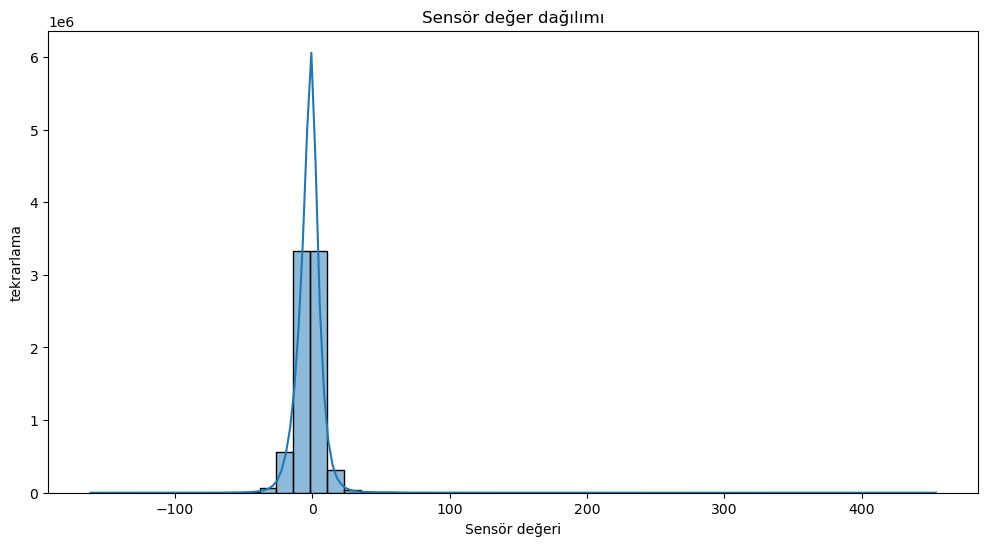

In [79]:
# Sensör değer dağılımı
plt.figure(figsize=(12, 6))
sns.histplot(train_data['sensor value'], bins=50, kde=True)
plt.title('Sensör değer dağılımı')
plt.xlabel('Sensör değeri')
plt.ylabel('tekrarlama')
plt.show()
plt.close()

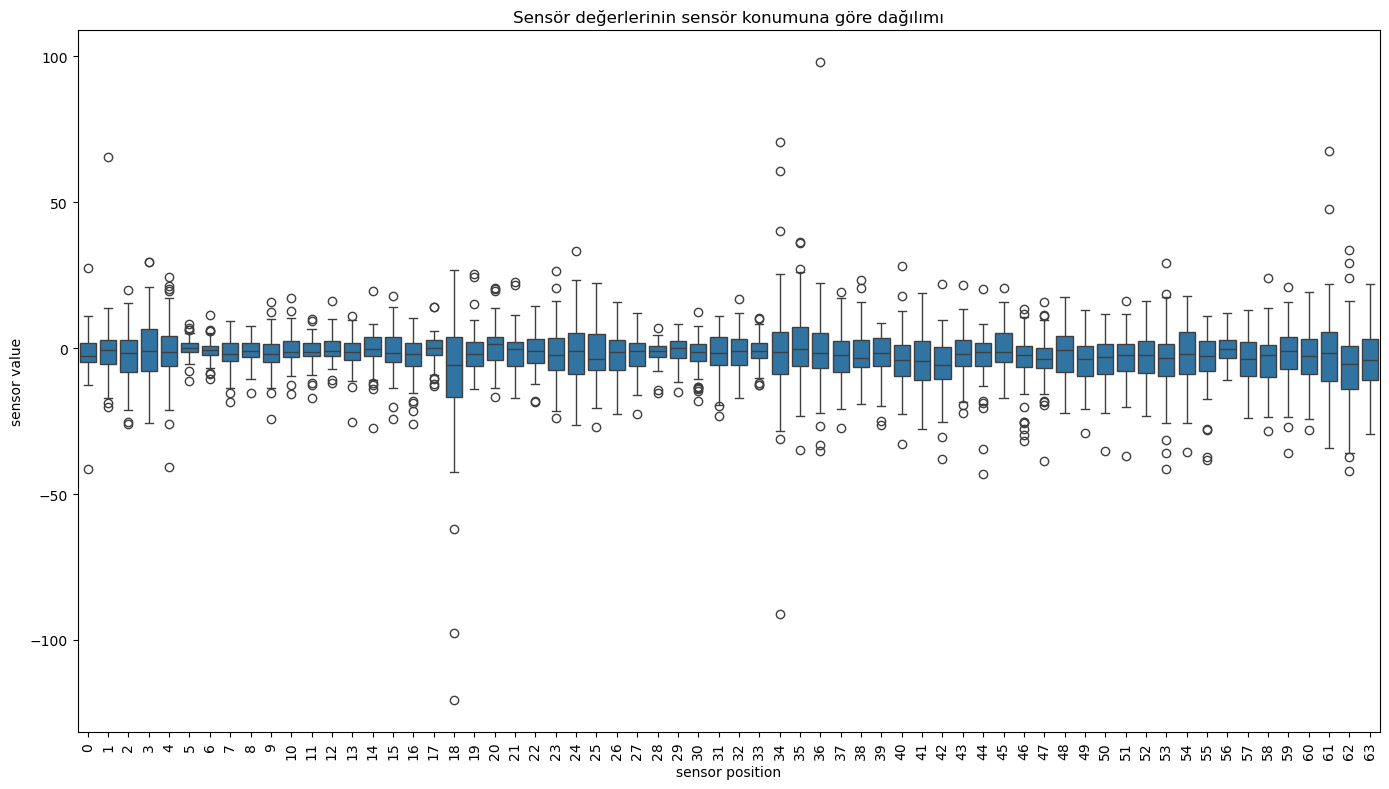

In [81]:
# Sensör konumuna göre sensör değerlerini analiz edin
plt.figure(figsize=(14, 8))
sns.boxplot(x='sensor position', y='sensor value', data=train_data.sample(min(5000, len(train_data))))
plt.title('Sensör değerlerinin sensör konumuna göre dağılımı')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.close()

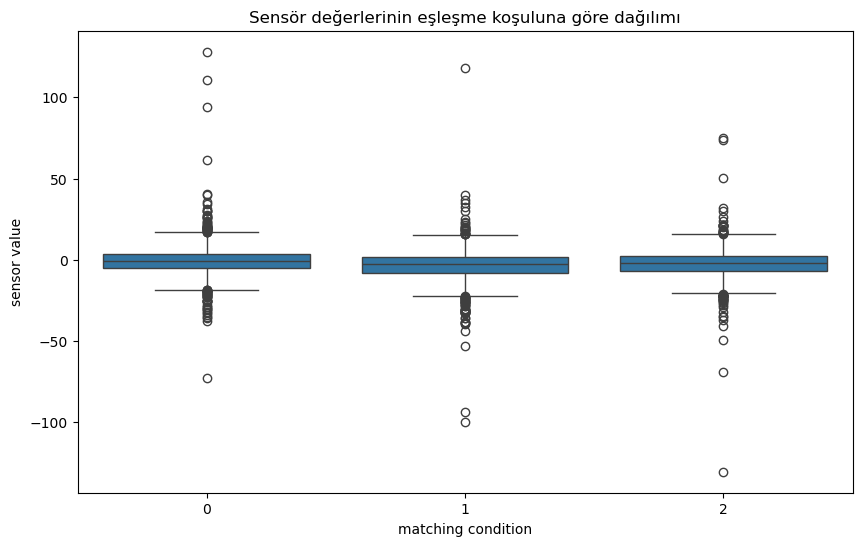

In [83]:
#Sensör değerlerini eşleşen duruma göre analiz edin
plt.figure(figsize=(10, 6))
sns.boxplot(x='matching condition', y='sensor value', data=train_data.sample(min(5000, len(train_data))))
plt.title('Sensör değerlerinin eşleşme koşuluna göre dağılımı')
plt.show()
plt.close()


=== Kanal bazında sensör değerlerinin özeti ===
    channel      mean  median        std
0         0 -1.254157  -2.238  23.359354
1         1 -0.966200  -1.872  14.234167
2         2 -2.864507  -2.645  10.938064
3         3 -1.936506  -2.075  11.073995
4         4 -1.360259  -1.536   9.724839
..      ...       ...     ...        ...
59       59 -1.778268  -1.414   7.433998
60       60 -1.319146  -1.068   6.900565
61       61 -0.471951  -0.153   4.561443
62       62 -1.617389  -2.157  14.169540
63       63 -4.160914  -4.150  12.717374

[64 rows x 4 columns]


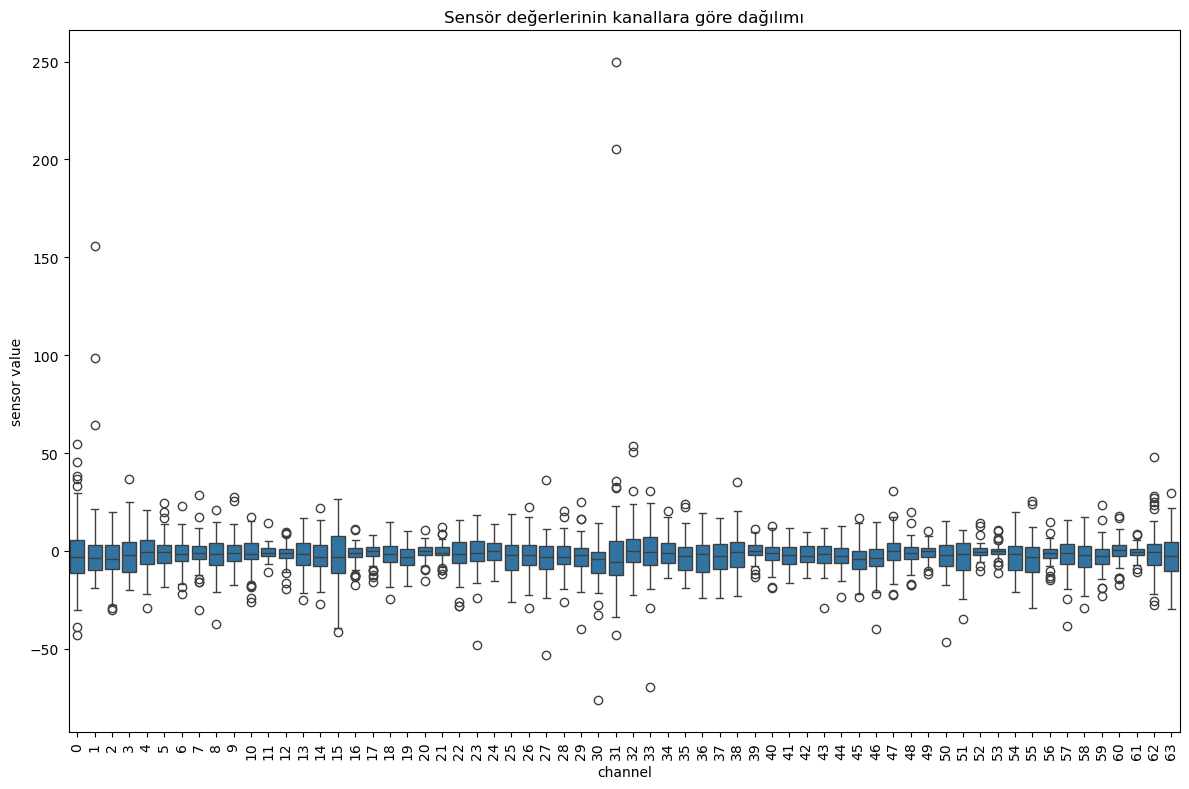

In [85]:
#Kanal bazında veri analizi
channel_summary = train_data.groupby('channel')['sensor value'].agg(['mean', 'median', 'std']).reset_index()
print("\n=== Kanal bazında sensör değerlerinin özeti ===")
print(channel_summary)

plt.figure(figsize=(12, 8))
sns.boxplot(x='channel', y='sensor value', data=train_data.sample(min(5000, len(train_data))))
plt.title('Sensör değerlerinin kanallara göre dağılımı')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.close()

In [87]:
#Her konuyu ayrı ayrı analiz edin
subject_summary = train_data.groupby('subject identifier')['sensor value'].agg(['count', 'mean', 'median', 'std']).reset_index()
print("\n=== Konuya göre sensör değerlerinin özeti ===")
print(subject_summary.head())  


=== Konuya göre sensör değerlerinin özeti ===
   subject identifier    count      mean  median        std
0                   0  3850240 -2.207275  -1.628   9.289286
1                   1  3817472 -1.949518  -1.658  10.268074


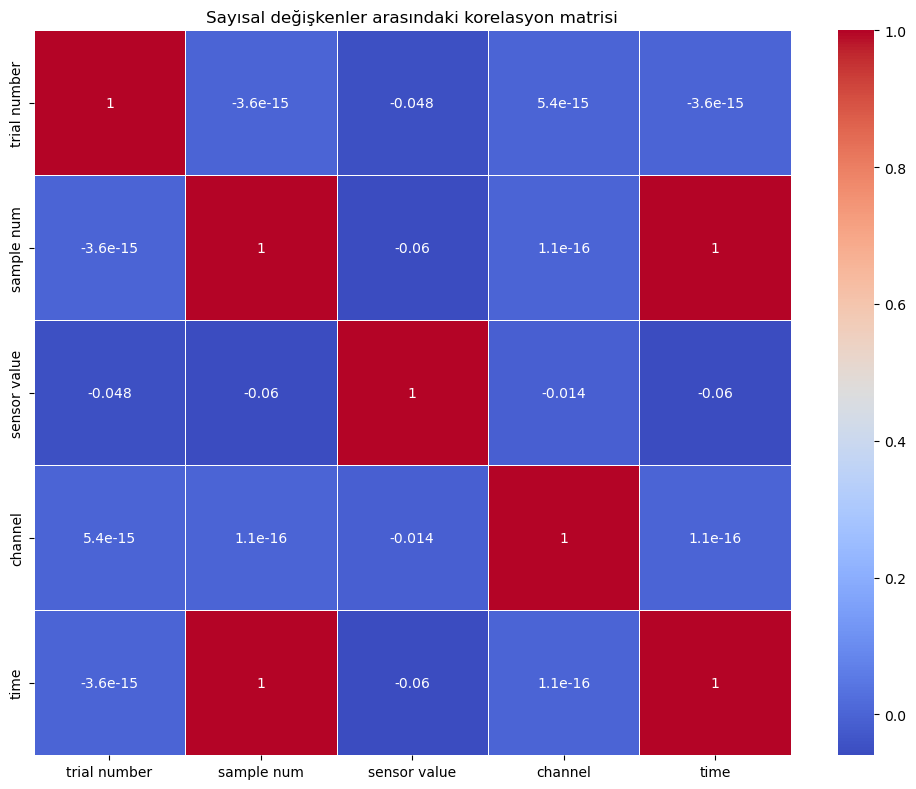

In [89]:
# Sayısal değişkenler arasındaki ilişkilerin analizi
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_columns) >= 2:
    correlation_matrix = train_data[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Sayısal değişkenler arasındaki korelasyon matrisi')
    plt.tight_layout()
    plt.show()
    plt.close()

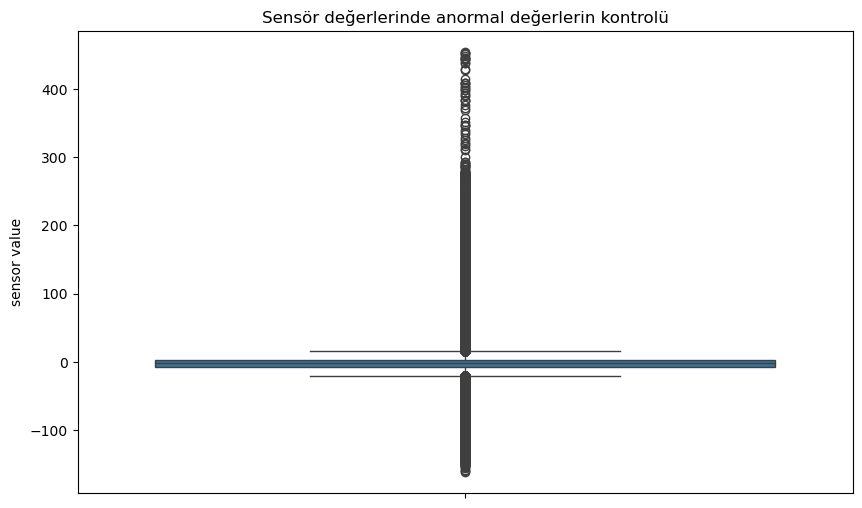

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='sensor value', data=train_data)
plt.title('Sensör değerlerinde anormal değerlerin kontrolü')
plt.show()
plt.close()

In [93]:
# Aykırı Değerleri Tespit Etmek İçin Dörtlük Hesaplaması
Q1 = train_data['sensor value'].quantile(0.25)
Q3 = train_data['sensor value'].quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

outliers = train_data[(train_data['sensor value'] < alt_sinir) | (train_data['sensor value'] > ust_sinir)]
print(f"\nAykırı değerlerin sayısı'sensor value': {len(outliers)}")

#Aykırı değerleri sınırlarla değiştirin:
train_data_cleaned = train_data.copy()
train_data_cleaned.loc[train_data_cleaned['sensor value'] < alt_sinir, 'sensor value'] = alt_sinir
train_data_cleaned.loc[train_data_cleaned['sensor value'] > ust_sinir, 'sensor value'] = ust_sinir
print(f"Aykırı değerler limitler kullanılarak ele alınır.: {alt_sinir} - {ust_sinir}")


Aykırı değerlerin sayısı'sensor value': 350536
Aykırı değerler limitler kullanılarak ele alınır.: -20.422 - 16.322


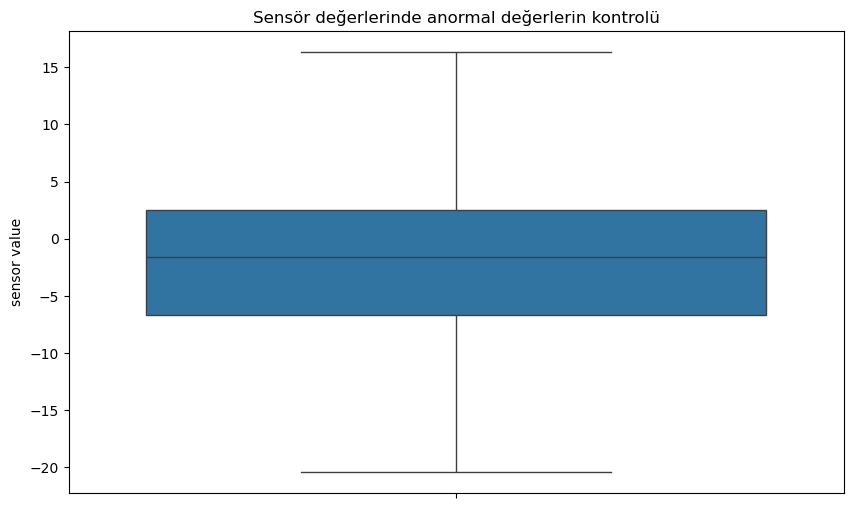

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='sensor value', data=train_data_cleaned)
plt.title('Sensör değerlerinde anormal değerlerin kontrolü')
plt.show()
plt.close()

In [97]:
train_data_cleaned.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,time
0,0,34,0,-8.921,0,0,0,0.000000
1,0,34,1,-8.433,0,0,0,0.003906
2,0,34,2,-2.574,0,0,0,0.007812
3,0,34,3,5.239,0,0,0,0.011719
4,0,34,4,11.587,0,0,0,0.015625


- Sayısal değişkenlerin analizi (test_data için)

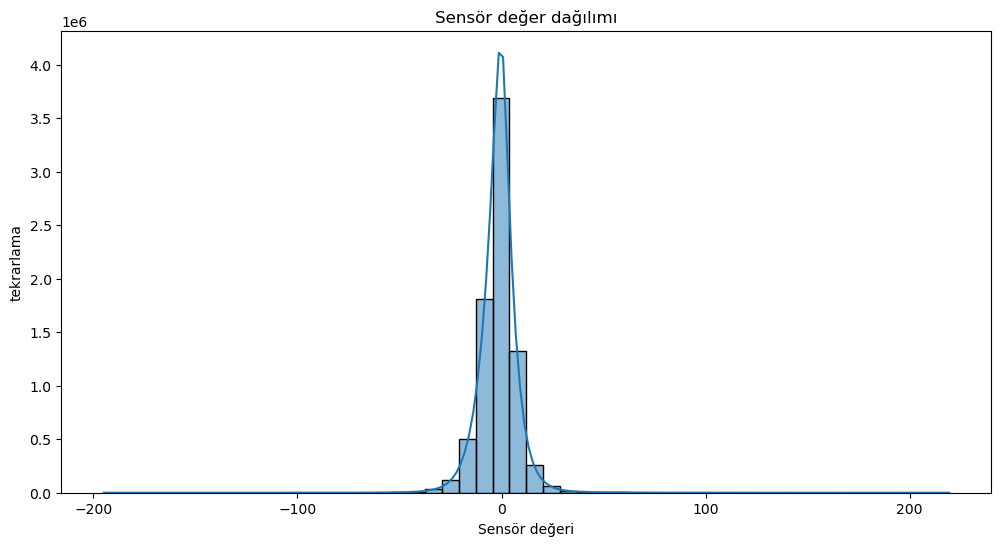

In [100]:
# Sensör değer dağılımı
plt.figure(figsize=(12, 6))
sns.histplot(test_data['sensor value'], bins=50, kde=True)
plt.title('Sensör değer dağılımı')
plt.xlabel('Sensör değeri')
plt.ylabel('tekrarlama')
plt.show()
plt.close()

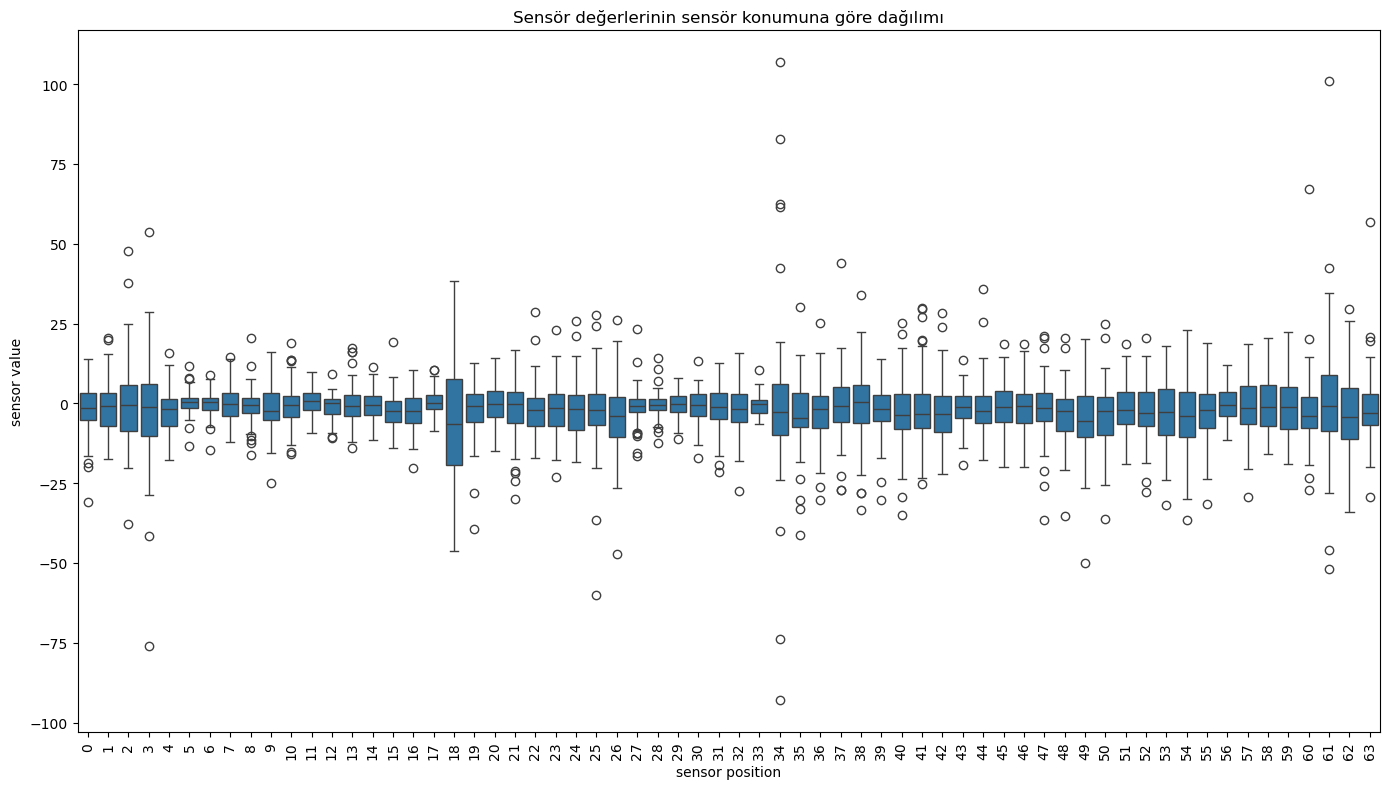

In [102]:
# Sensör konumuna göre sensör değerlerini analiz edin
plt.figure(figsize=(14, 8))
sns.boxplot(x='sensor position', y='sensor value', data=test_data.sample(min(5000, len(test_data))))
plt.title('Sensör değerlerinin sensör konumuna göre dağılımı')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.close()

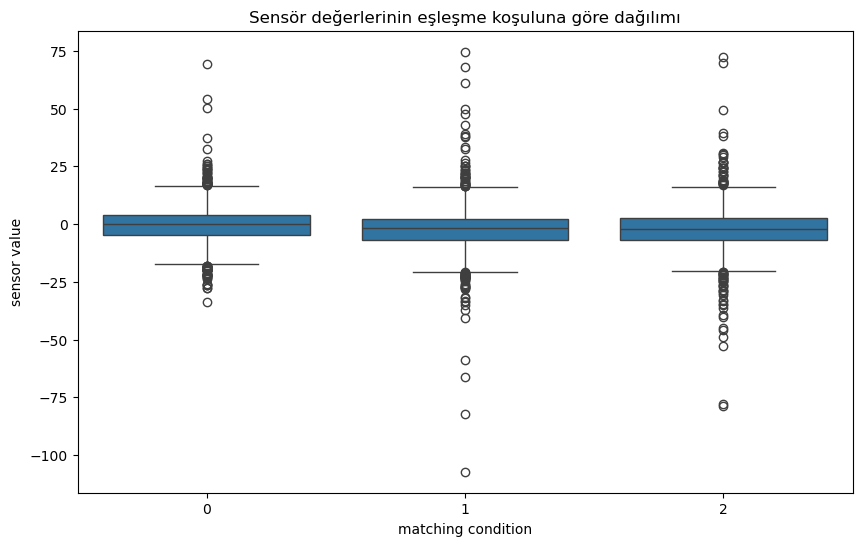

In [104]:
#Sensör değerlerini eşleşen duruma göre analiz edin
plt.figure(figsize=(10, 6))
sns.boxplot(x='matching condition', y='sensor value', data=test_data.sample(min(5000, len(test_data))))
plt.title('Sensör değerlerinin eşleşme koşuluna göre dağılımı')
plt.show()
plt.close()


=== Kanal bazında sensör değerlerinin özeti ===
    channel      mean  median        std
0         0 -0.710662  -1.231  22.118746
1         1 -0.944546  -1.282  12.437646
2         2 -1.719285  -1.536  10.687164
3         3 -1.713794  -1.506  11.758362
4         4 -0.955723  -0.936   9.207443
..      ...       ...     ...        ...
59       59 -0.948689  -0.946   7.878226
60       60 -0.666443  -0.671   6.660845
61       61  0.124418   0.102   3.814683
62       62 -1.164379  -1.556  12.019841
63       63 -3.385593  -2.899  12.160235

[64 rows x 4 columns]


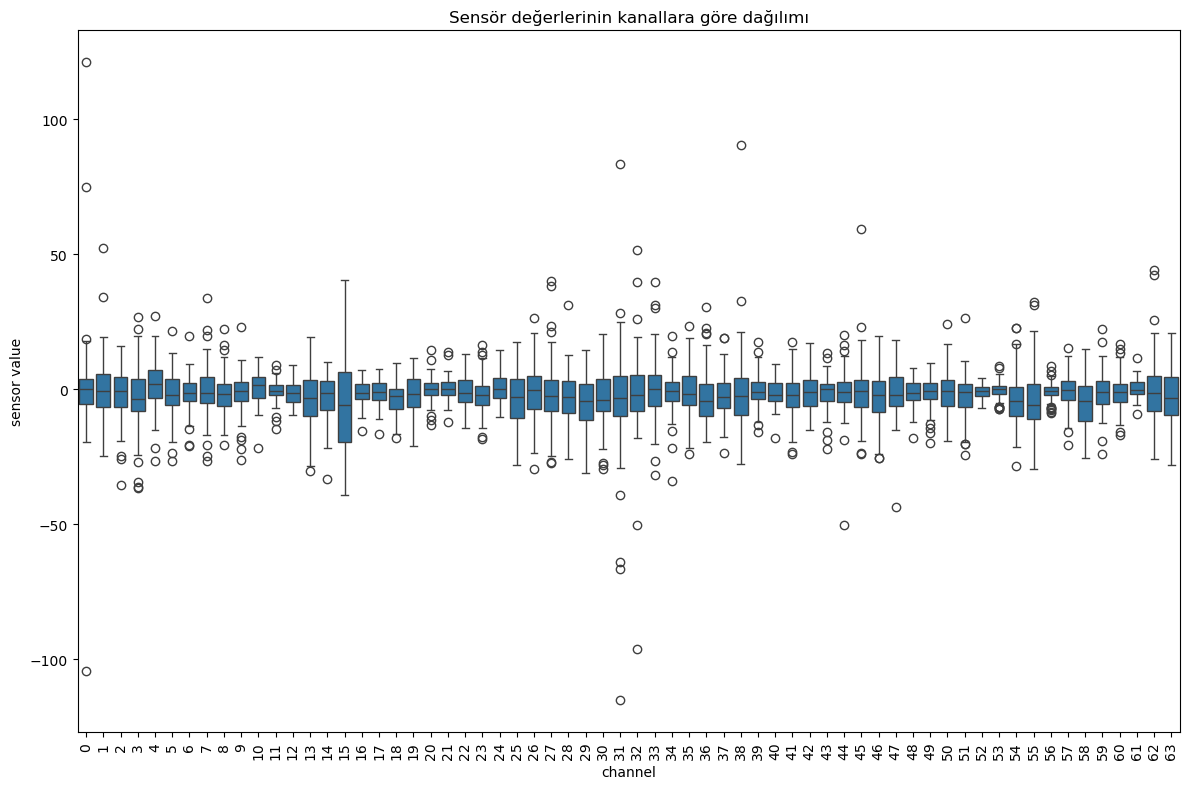

In [106]:
#Kanal bazında veri analizi
channel_summary = test_data.groupby('channel')['sensor value'].agg(['mean', 'median', 'std']).reset_index()
print("\n=== Kanal bazında sensör değerlerinin özeti ===")
print(channel_summary)

plt.figure(figsize=(12, 8))
sns.boxplot(x='channel', y='sensor value', data=test_data.sample(min(5000, len(test_data))))
plt.title('Sensör değerlerinin kanallara göre dağılımı')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.close()

In [108]:
#Her konuyu ayrı ayrı analiz edin
subject_summary = test_data.groupby('subject identifier')['sensor value'].agg(['count', 'mean', 'median', 'std']).reset_index()
print("\n=== Konuya göre sensör değerlerinin özeti ===")
print(subject_summary.head())  


=== Konuya göre sensör değerlerinin özeti ===
   subject identifier    count      mean  median       std
0                   0  3932160 -0.967152  -0.753  8.998492
1                   1  3932160 -2.066338  -1.607  9.764781


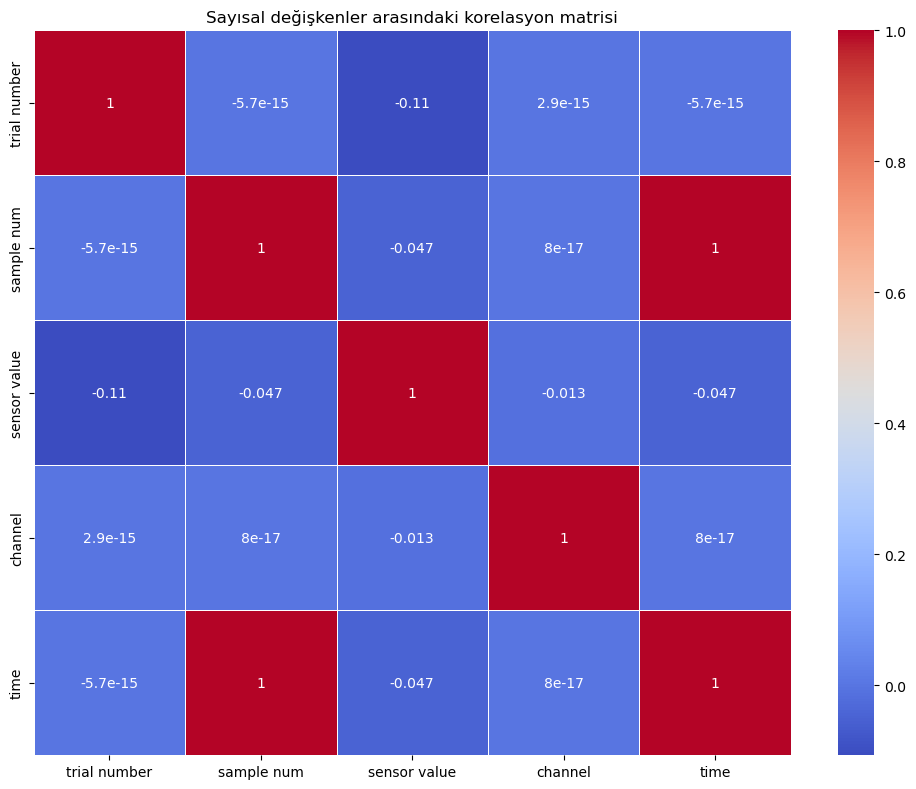

In [110]:
# Sayısal değişkenler arasındaki ilişkilerin analizi
numeric_columns = test_data.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_columns) >= 2:
    correlation_matrix = test_data[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Sayısal değişkenler arasındaki korelasyon matrisi')
    plt.tight_layout()
    plt.show()
    plt.close()

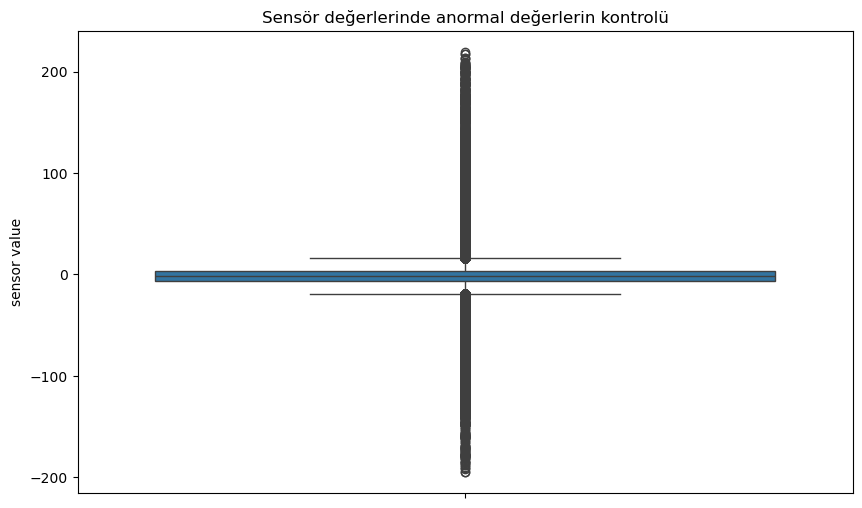

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='sensor value', data=test_data)
plt.title('Sensör değerlerinde anormal değerlerin kontrolü')
plt.show()
plt.close()

In [114]:
# Aykırı Değerleri Tespit Etmek İçin Dörtlük Hesaplaması
Q1 = test_data['sensor value'].quantile(0.25)
Q3 = test_data['sensor value'].quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

outliers_test = test_data[(test_data['sensor value'] < alt_sinir) | (test_data['sensor value'] > ust_sinir)]
print(f"\nAykırı değerlerin sayısı'sensor value': {len(outliers_test)}")

#Aykırı değerleri sınırlarla değiştirin:
test_data_cleaned = test_data.copy()
test_data_cleaned.loc[test_data_cleaned['sensor value'] < alt_sinir, 'sensor value'] = alt_sinir
test_data_cleaned.loc[test_data_cleaned['sensor value'] > ust_sinir, 'sensor value'] = ust_sinir
print(f"Aykırı değerler limitler kullanılarak ele alınır.: {alt_sinir} - {ust_sinir}")


Aykırı değerlerin sayısı'sensor value': 394906
Aykırı değerler limitler kullanılarak ele alınır.: -19.4855 - 16.6065


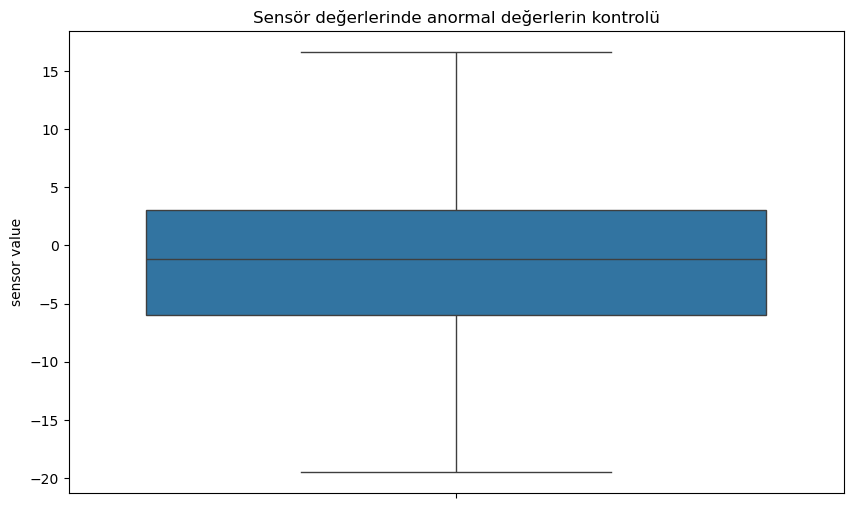

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='sensor value', data=test_data_cleaned)
plt.title('Sensör değerlerinde anormal değerlerin kontrolü')
plt.show()
plt.close()

In [118]:
test_data_cleaned.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,time
0,30,34,0,-3.550,0,0,0,0.000000
1,30,34,1,-5.015,0,0,0,0.003906
2,30,34,2,-5.503,0,0,0,0.007812
3,30,34,3,-3.550,0,0,0,0.011719
4,30,34,4,-0.621,0,0,0,0.015625


In [121]:
print("Eğitim Verisi - Toplam Satır Sayısı:", len(train_data_cleaned))
print("Test Verisi - Toplam Satır Sayısı:", len(test_data_cleaned))

Eğitim Verisi - Toplam Satır Sayısı: 7667712
Test Verisi - Toplam Satır Sayısı: 7864320


# Değişken Açıklamaları

- trial number: Denemenin numarası
- sensor position: Konum, konumu şu şekilde belirlenen elektrot (Ulusal 10-20 sistemine dayalı)

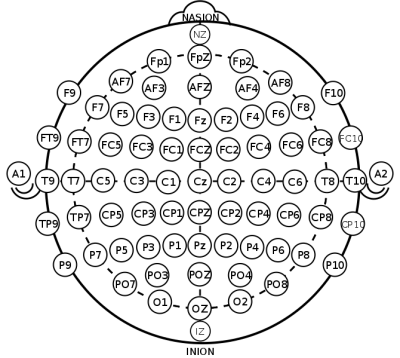

- sample num: 0-255
- sensor value: Mikrovolttaki değer
- subject identifier: a - Alkol kullanan; c - Kontrol
- matching condition:
    - S1 obj - Tek bir nesnenin gösterildiği durum;
    - S2 match - nesne 2'nin benzer bir durumda gösterildiği durum (S1, S2 ile aynıydı),
    - S2 nomatch - nesne 2'nin benzer olmayan bir durumda gösterildiği durum (S1, S2'den farklıydı)
- channel: Kanal numarası (0-63). Temel olarak, bu, sensor position sütunuyla aynıdır, bu nedenle bu sütunlardan biri atılabilir
- name: Her bir katılımcıya atanmış bir seri kod
- time: Saniye cinsinden ölçülen sample num'nin tersi

# Özellik seçimi 

* Çalışmanın bağlamı ve projemizin araştırma soruları dikkate alınarak hedef değişken, kişinin alkol bağımlısı mı yoksa kontrol grubundan mı olduğunu gösteren “subject identifier” sütunu olacaktır.

In [130]:
train_data_cleaned.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,time
0,0,34,0,-8.921,0,0,0,0.000000
1,0,34,1,-8.433,0,0,0,0.003906
2,0,34,2,-2.574,0,0,0,0.007812
3,0,34,3,5.239,0,0,0,0.011719
4,0,34,4,11.587,0,0,0,0.015625


In [132]:
target_column = 'subject identifier'
sayısal_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
sayısal_columns.append(target_column)
sayısal_columns

['trial number',
 'sample num',
 'sensor value',
 'channel',
 'time',
 'subject identifier']

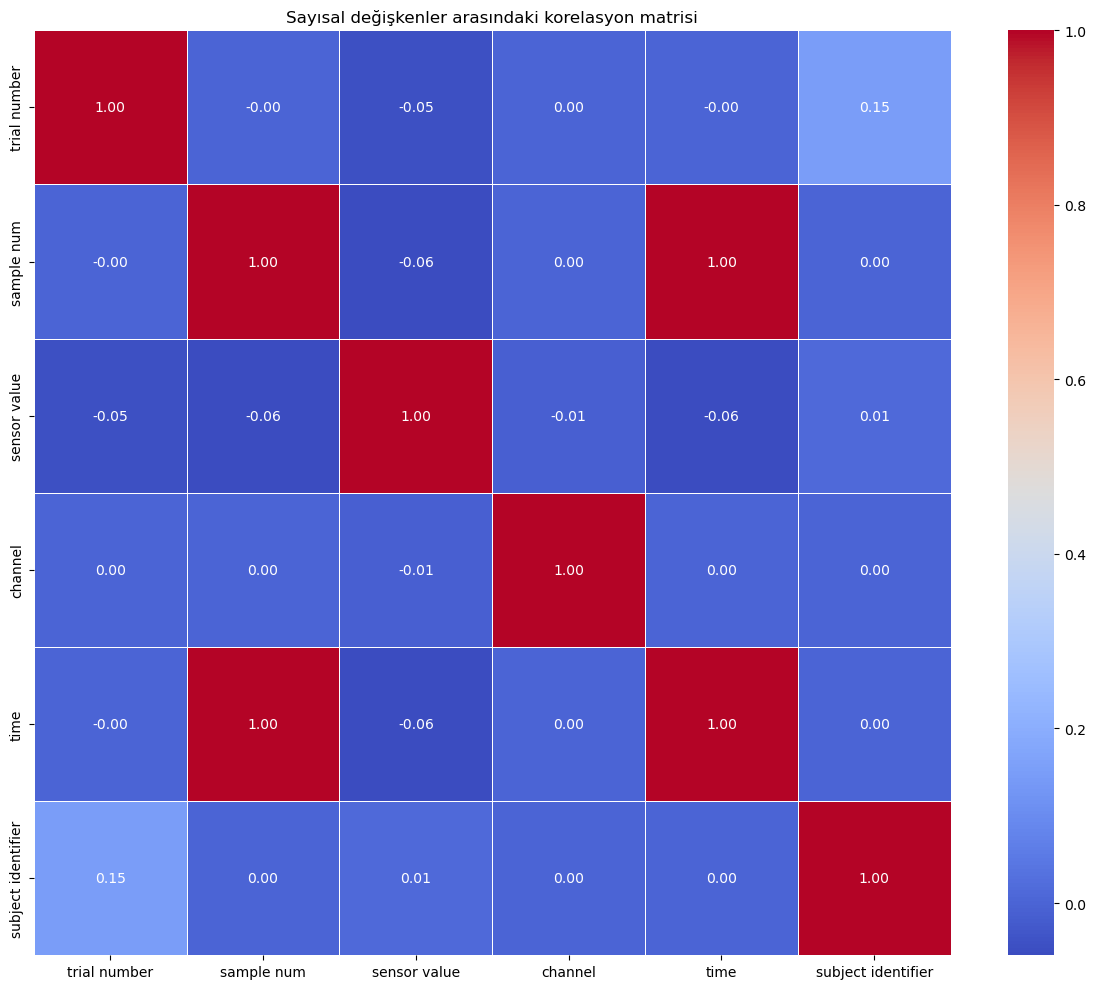

In [134]:
# Bir korelasyon matrisi oluşturun:
correlation_matrix = train_data[sayısal_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Sayısal değişkenler arasındaki korelasyon matrisi')
plt.tight_layout()
plt.show()


=== Hedef değişkenle en yakından ilişkili özellikler ===
trial number    1.483321e-01
sensor value    1.316460e-02
channel         1.807610e-14
sample num      1.258871e-14
time            1.258871e-14
Name: subject identifier, dtype: float64


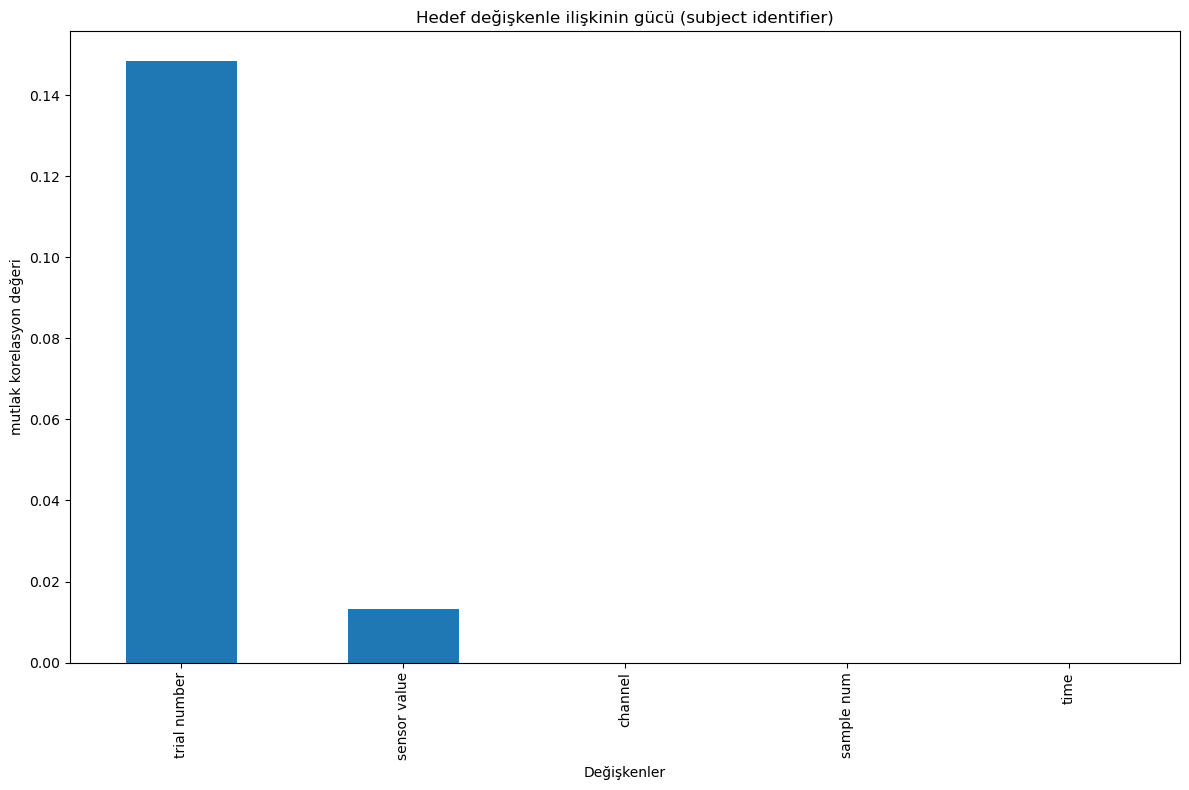

In [136]:
# Hedef değişkenle korelasyon değerlerini çıkar ve sırala.
target_correlations = correlation_matrix[target_column].drop(target_column)
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

print("\n=== Hedef değişkenle en yakından ilişkili özellikler ===")
print(sorted_correlations)

plt.figure(figsize=(12, 8))
sorted_correlations.plot(kind='bar')
plt.title(f'Hedef değişkenle ilişkinin gücü ({target_column})')
plt.ylabel('mutlak korelasyon değeri')
plt.xlabel('Değişkenler')
plt.tight_layout()
plt.show()

In [138]:
n_features = 5  
top_features = sorted_correlations.head(n_features).index.tolist()

print(f"\nEn iyi {n_features} özelliği seçildi:")
print(top_features)

selected_features = top_features.copy()
if target_column not in selected_features:
    selected_features.append(target_column)

selected_train_data = train_data[selected_features] #modeller icin

print("\n=== Özellikleri seçtikten sonra verilere bir bakış ===")
print(selected_train_data.head())


En iyi 5 özelliği seçildi:
['trial number', 'sensor value', 'channel', 'sample num', 'time']

=== Özellikleri seçtikten sonra verilere bir bakış ===
   trial number  sensor value  channel  sample num      time  \
0             0        -8.921        0           0  0.000000   
1             0        -8.433        0           1  0.003906   
2             0        -2.574        0           2  0.007812   
3             0         5.239        0           3  0.011719   
4             0        11.587        0           4  0.015625   

   subject identifier  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


In [140]:
selected_train_data

,trial number,sensor value,channel,sample num,time,subject identifier
0,0,-8.921,0,0,0.000000,0
1,0,-8.433,0,1,0.003906,0
2,0,-2.574,0,2,0.007812,0
3,0,5.239,0,3,0.011719,0
4,0,11.587,0,4,0.015625,0
...,...,...,...,...,...,...
7667707,12,10.447,63,251,0.980469,0
7667708,12,11.424,63,252,0.984375,0
7667709,12,10.935,63,253,0.988281,0
7667710,12,9.959,63,254,0.992188,0


# Görselleştirme 

In [242]:
train_data_cleaned

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,time
0,0,34,0,-8.921,0,0,0,0.000000
1,0,34,1,-8.433,0,0,0,0.003906
2,0,34,2,-2.574,0,0,0,0.007812
3,0,34,3,5.239,0,0,0,0.011719
4,0,34,4,11.587,0,0,0,0.015625
...,...,...,...,...,...,...,...,...
7667707,12,62,251,10.447,0,0,63,0.980469
7667708,12,62,252,11.424,0,0,63,0.984375
7667709,12,62,253,10.935,0,0,63,0.988281
7667710,12,62,254,9.959,0,0,63,0.992188


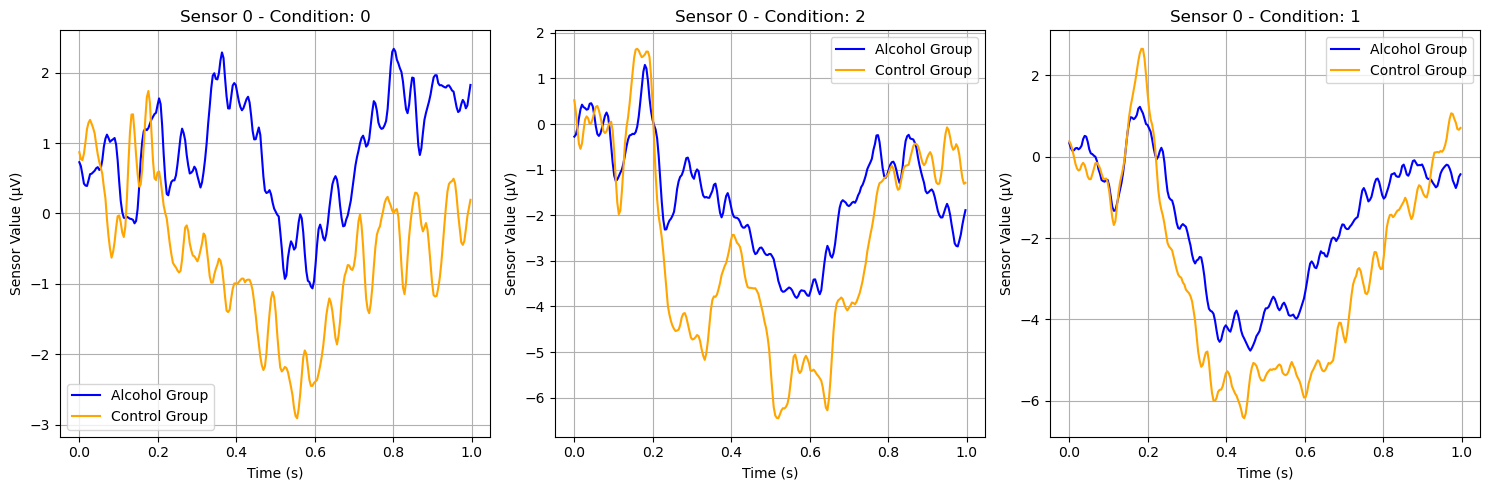

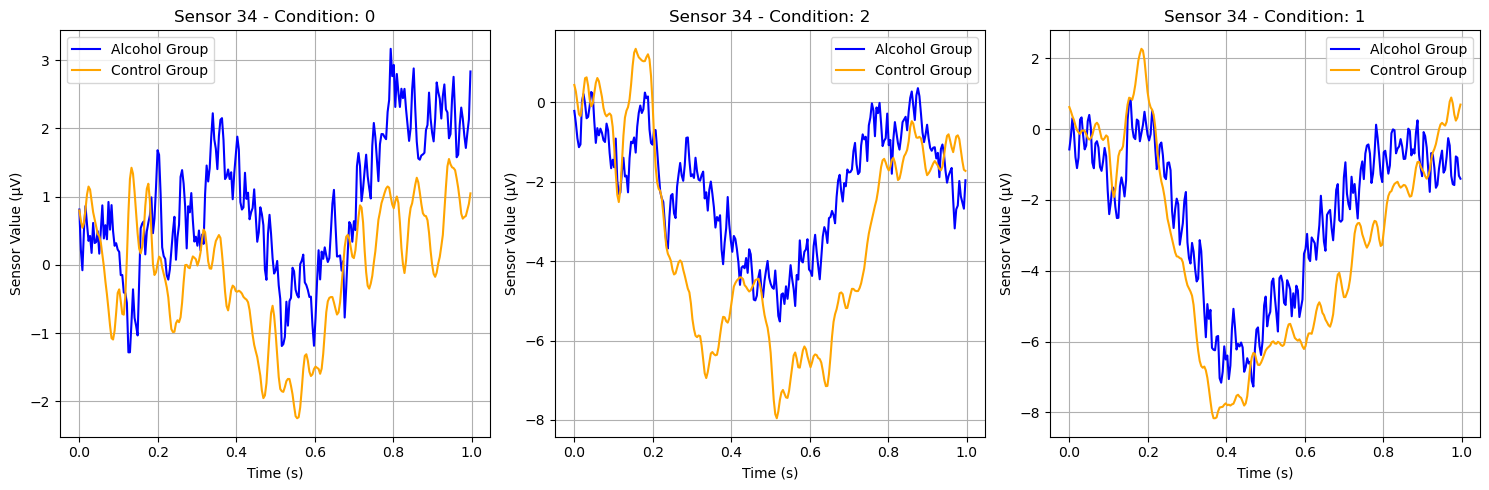

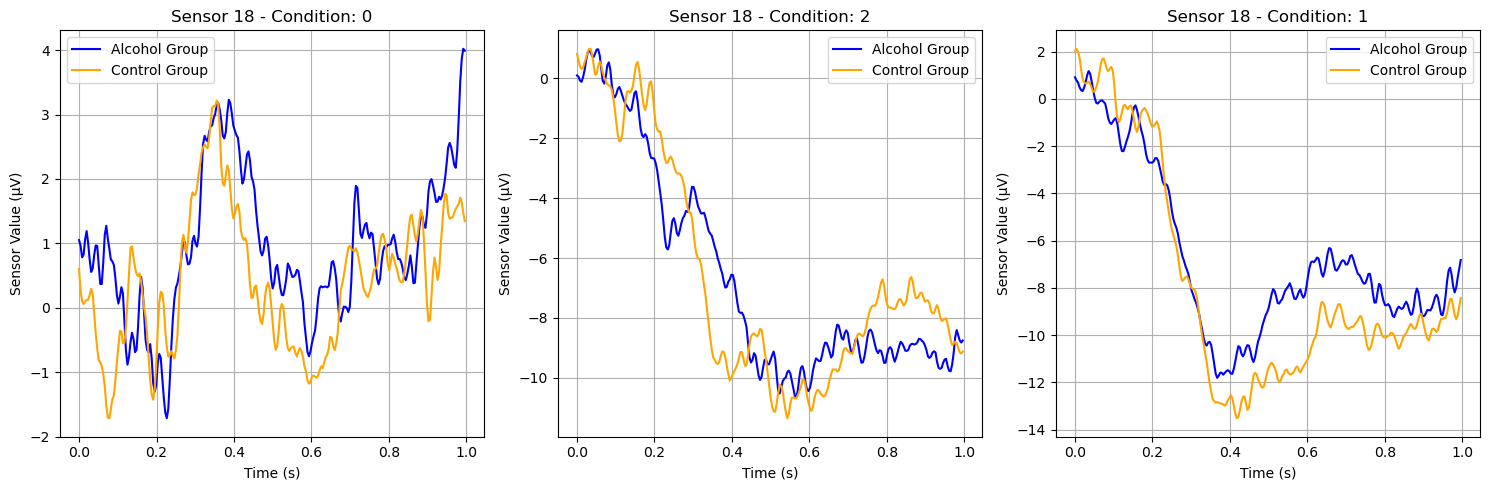

In [248]:


combined_df = pd.concat([train_data_cleaned, test_data_cleaned], ignore_index=True)

df_alcohol = combined_df[combined_df['subject identifier'] == 0]
df_control = combined_df[combined_df['subject identifier'] == 1]

sensors_to_plot = [0, 34, 18]

def plot_eeg_data(df_alcohol, df_control, sensors):
    for sensor in sensors:
        plt.figure(figsize=(15, 5))
        conditions = df_alcohol['matching condition'].dropna().unique()
        for i, condition in enumerate(conditions):
            plt.subplot(1, len(conditions), i + 1)

            subset_alcohol = df_alcohol[
                (df_alcohol['sensor position'] == sensor) & 
                (df_alcohol['matching condition'] == condition)
            ]
            if not subset_alcohol.empty:
                subset_alcohol.groupby('time')['sensor value'].mean().plot(
                    label='Alcohol Group', color='blue', linewidth=1.5
                )

            subset_control = df_control[
                (df_control['sensor position'] == sensor) & 
                (df_control['matching condition'] == condition)
            ]
            if not subset_control.empty:
                subset_control.groupby('time')['sensor value'].mean().plot(
                    label='Control Group', color='orange', linewidth=1.5
                )

            plt.title(f'Sensor {sensor} - Condition: {condition}')
            plt.xlabel('Time (s)')
            plt.ylabel('Sensor Value (µV)')
            plt.grid(True)

            if not subset_alcohol.empty or not subset_control.empty:
                plt.legend()

        plt.tight_layout()
        plt.show()

plot_eeg_data(df_alcohol, df_control, sensors_to_plot)


# Model eğitimi

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [170]:
#Orijinal verilerden 500.000 kayıt örneği
def sample_data(data, n_samples=1000000):
    if len(data) > n_samples:
        return data.sample(n=n_samples, random_state=42)
    return data

train_data_sampled = sample_data(train_data)
test_data_sampled = sample_data(test_data, n_samples=min(len(test_data), 300000))

print(f"Örneklemeden sonra eğitim verisi boyutu: {len(train_data_sampled)}")
print(f"Örneklemeden sonra test verisi boyutu: {len(test_data_sampled)}")

Örneklemeden sonra eğitim verisi boyutu: 1000000
Örneklemeden sonra test verisi boyutu: 300000


In [172]:
def preprocess_data(data):
    data.columns = ['trial_number', 'sensor_position', 'sample_num', 'sensor_value', 
                     'subject_identifier', 'matching_condition', 'channel', 'time']

    features = data.groupby(['subject_identifier', 'trial_number', 'sensor_position']).agg({
        'sensor_value': ['mean', 'std', 'min', 'max']
    }).reset_index()
    
    features.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in features.columns.values]
    
    features_pivot = features.pivot_table(
        index=['subject_identifier_', 'trial_number_'],
        columns='sensor_position_',
        values=['sensor_value_mean', 'sensor_value_std', 'sensor_value_min', 'sensor_value_max']
    )
    
    features_pivot.columns = [f"{col[0]}_{col[1]}" for col in features_pivot.columns]
    features_pivot = features_pivot.reset_index()
    
    y = features_pivot['subject_identifier_'].values
    
    X = features_pivot.drop(['subject_identifier_', 'trial_number_'], axis=1)
    
    return X, y

In [174]:
X_train, y_train = preprocess_data(train_data_sampled)

X_test, y_test = preprocess_data(test_data_sampled)

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Veri normalizasyonu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Random Forest Modeli:

In [203]:
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=20,     
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',  
    n_jobs=-1,          
    random_state=42,
    verbose=1        
)

print("Model eğitimine başla...")
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model doğruluğu: {accuracy:.4f}")

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=['Alkollü (0)', 'Kontrolcü (1)']))

print("\nKarışıklık matrisi:")
print(confusion_matrix(y_test, y_pred))

feature_importance = pd.DataFrame(
    {'feature': X_train.columns, 'importance': rf_model.feature_importances_}
)
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTemel özellikler:")
print(feature_importance.head(10))  

# حفظ النموذج
import joblib
joblib.dump(rf_model, 'random_forest_eeg_model.pkl')
print("Form başarıyla kaydedildi.")


Model eğitimine başla...
Model doğruluğu: 0.8525

Sınıflandırma Raporu:
               precision    recall  f1-score   support

  Alkollü (0)       0.91      0.75      0.83        57
Kontrolcü (1)       0.81      0.94      0.87        65

     accuracy                           0.85       122
    macro avg       0.86      0.85      0.85       122
 weighted avg       0.86      0.85      0.85       122


Karışıklık matrisi:
[[43 14]
 [ 4 61]]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished



Temel özellikler:
                 feature  importance
226  sensor_value_std_34    0.066358
162  sensor_value_min_34    0.064086
34   sensor_value_max_34    0.035677
225  sensor_value_std_33    0.023362
247  sensor_value_std_55    0.023270
133   sensor_value_min_5    0.023199
220  sensor_value_std_28    0.022663
222  sensor_value_std_30    0.021393
47   sensor_value_max_47    0.020997
196   sensor_value_std_4    0.020121
Form başarıyla kaydedildi.


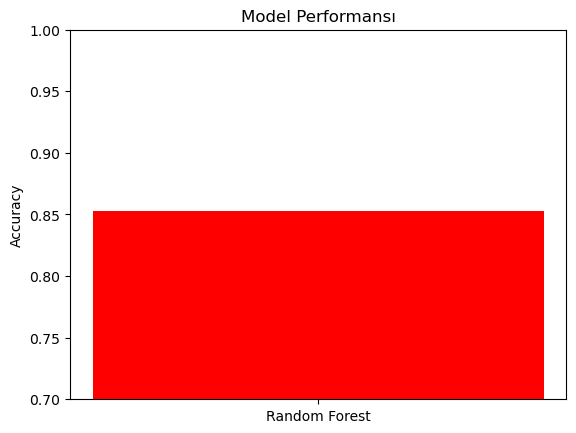

In [211]:
import matplotlib.pyplot as plt

# Model isimleri
model_names = ['Random Forest']

# Doğruluk oranları
accuracies = [0.95]  # Buraya gerçek doğruluk değerini gir

# Bar grafiği oluştur
plt.bar(model_names, [accuracy], color=['red'])
plt.ylabel('Accuracy')
plt.title('Model Performansı')
plt.ylim(0.7, 1.0)  # Y eksenini 0.9 ile 1.0 arasında sınırla
plt.show()


- Algoritmalar:

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import warnings

In [222]:
warnings.filterwarnings("ignore") 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# =====================
# 1. Random Forest
# =====================
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf_model, rf_params, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("En iyi işlemler Random Forest:", rf_grid.best_params_)
print("Çapraz doğrulama doğruluğu:", rf_grid.best_score_)

# =====================
# 2. Logistic Regression
# =====================
lr_model = LogisticRegression(max_iter=1000)
lr_params = {
    'C': [0.01, 0.1, 1.0],
    'penalty': ['l2']
}
lr_grid = GridSearchCV(lr_model, lr_params, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
lr_grid.fit(X_train, y_train)

print("\nEn İyi Lojistik Regresyon İşlemleri:", lr_grid.best_params_)
print("Çapraz doğrulama doğruluğu:", lr_grid.best_score_)

# =====================
# 3. Gradient Boosting
# =====================
gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
gb_grid = GridSearchCV(gb_model, gb_params, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
gb_grid.fit(X_train, y_train)

print("\nEn İyi Gradient Arttırma İşlemleri:", gb_grid.best_params_)
print("Çapraz doğrulama doğruluğu:", gb_grid.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
En iyi işlemler Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Çapraz doğrulama doğruluğu: 0.9246753246753248
Fitting 5 folds for each of 3 candidates, totalling 15 fits

En İyi Lojistik Regresyon İşlemleri: {'C': 0.01, 'penalty': 'l2'}
Çapraz doğrulama doğruluğu: 0.9528138528138527
Fitting 5 folds for each of 8 candidates, totalling 40 fits

En İyi Gradient Arttırma İşlemleri: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Çapraz doğrulama doğruluğu: 0.8883116883116884


In [224]:
best_rf = rf_grid.best_estimator_
best_lr = lr_grid.best_estimator_
best_gb = gb_grid.best_estimator_


y_pred_rf = best_rf.predict(X_test)
y_pred_lr = best_lr.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

In [230]:
from statsmodels.stats.contingency_tables import mcnemar

def run_mcnemar(y_true, pred1, pred2, name1, name2):
    table = np.zeros((2, 2))
    for i in range(len(y_true)):
        correct1 = pred1[i] == y_true[i]
        correct2 = pred2[i] == y_true[i]
        table[int(not correct1)][int(not correct2)] += 1
    result = mcnemar(table, exact=True)
    print(f"\nMcNemar Test: {name1} vs {name2}")
    print(f"Statistic = {result.statistic}, p-value = {result.pvalue:.5f}")
    if result.pvalue < 0.05:
        print("⬆ Aradaki fark istatistiksel olarak anlamlıdır.")
    else:
        print("⬇ Aradaki fark istatistiksel olarak anlamlı değildir.")


In [232]:
run_mcnemar(y_test, y_pred_rf, y_pred_lr, "Random Forest", "Logistic Regression")
run_mcnemar(y_test, y_pred_rf, y_pred_gb, "Random Forest", "Gradient Boosting")
run_mcnemar(y_test, y_pred_lr, y_pred_gb, "Logistic Regression", "Gradient Boosting")


McNemar Test: Random Forest vs Logistic Regression
Statistic = 4.0, p-value = 0.54883
⬇ Aradaki fark istatistiksel olarak anlamlı değildir.

McNemar Test: Random Forest vs Gradient Boosting
Statistic = 7.0, p-value = 0.00813
⬆ Aradaki fark istatistiksel olarak anlamlıdır.

McNemar Test: Logistic Regression vs Gradient Boosting
Statistic = 5.0, p-value = 0.00091
⬆ Aradaki fark istatistiksel olarak anlamlıdır.


<Figure size 600x400 with 0 Axes>

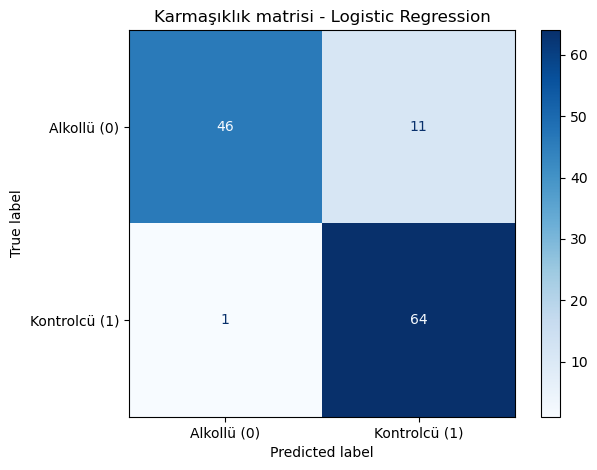

In [234]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Alkollü (0)', 'Kontrolcü (1)'])

plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Karmaşıklık matrisi - Logistic Regression")
plt.grid(False)
plt.tight_layout()
plt.show()